# Kin Analytics Exercise - Trosman Denis - Churn Prediction

# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Configs
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

# Read Files

### Clients

In [2]:
date_cols_clients = ['application_date','birth_date','exit_date']
df_clients = pd.read_csv('../data/clients_table.txt', parse_dates=date_cols_clients)
df_clients.head()

,CustomerId,Surname,Geography,Gender,HasCrCard,IsActiveMember,EstimatedSalary,application_date,exit_date,birth_date
0,15745584,EIRLS,Germany,Female,0.00,1.00,0.00,2018-12-14,NaT,1997-09-18
1,14990118,MOLOCK,Italy,Male,1.00,0.00,121219.28,2019-01-08,NaT,1980-08-03
2,14733224,PAWLUCH,Italy,Female,1.00,1.00,159663.59,2012-08-01,2013-08-09,1977-08-19
3,14648573,NALLS,Spain,Male,1.00,0.00,140827.98,2019-06-19,NaT,1979-02-27
4,15365443,EBERLE,Italy,Male,1.00,0.00,35521.28,2014-01-26,2015-12-04,1972-12-21


In [3]:
print(f'Number of rows: {df_clients.shape[0]}, Number of columns:{df_clients.shape[1]}')
print(f'\n Duplicated amount: {df_clients.duplicated().sum()}\n')
print('-'*30 + 'Number of null values' +'-'*30)
print(df_clients.isna().sum())
print('-'*30 + 'Type of variables' +'-'*30)
df_clients.dtypes

Number of rows: 1545000, Number of columns:10

 Duplicated amount: 45000

------------------------------Number of null values------------------------------
CustomerId               0
Surname              74916
Geography            58459
Gender               74886
HasCrCard            74886
IsActiveMember       74886
EstimatedSalary      74886
application_date         0
exit_date           490414
birth_date           74886
dtype: int64
------------------------------Type of variables------------------------------


CustomerId                   int64
Surname                     object
Geography                   object
Gender                      object
HasCrCard                  float64
IsActiveMember             float64
EstimatedSalary            float64
application_date    datetime64[ns]
exit_date           datetime64[ns]
birth_date          datetime64[ns]
dtype: object

### Credit score

In [4]:
df_credit_score = pd.read_csv('../data/credit_score_table.txt', parse_dates=['Date'])
df_credit_score.head()

,CustomerId,Date,Score
0,14759722,2018-07-01,717
1,15907276,2011-09-01,562
2,15346641,2013-01-01,604
3,15595126,2018-08-01,469
4,15227788,2013-09-01,655


In [5]:
print(f'Number of rows: {df_credit_score.shape[0]}, Number of columns:{df_credit_score.shape[1]}')
print(f'\n Duplicated amount: {df_credit_score.duplicated().sum()}\n')
print('-'*30 + 'Number of null values' +'-'*30)
print(df_credit_score.isna().sum())
print('-'*30 + 'Type of variables' +'-'*30)
df_credit_score.dtypes

Number of rows: 19500000, Number of columns:3



 Duplicated amount: 0

------------------------------Number of null values------------------------------
CustomerId    0
Date          0
Score         0
dtype: int64
------------------------------Type of variables------------------------------


CustomerId             int64
Date          datetime64[ns]
Score                  int64
dtype: object

### Products

In [6]:
df_products = pd.read_csv('../data/products_table.txt')
df_products.head()

,ContractId,CustomerId,Products
0,5Xo9sCduOGo5EhBYhzKrSlLIA,14993808,Product B
1,3nQbqbnpTeSkYIJWT1UDe1GZ1,15560417,Product B
2,PD9KwDPOwyJWO6LJKPGBbkrCz,15406428,Product C
3,IhS7pz8lu07LCZSqYNlL0fuLP,15604313,Product B
4,ftUey4oVmkZj8RaBVFH6SNzVM,14952409,Product C


In [7]:
print(f'Number of rows: {df_products.shape[0]}, Number of columns:{df_products.shape[1]}')
print(f'\n Duplicated amount: {df_products.duplicated().sum()}\n')
print('-'*30 + 'Number of null values' +'-'*30)
print(df_products.isna().sum())
print('-'*30 + 'Type of variables' +'-'*30)
df_products.dtypes

Number of rows: 3739192, Number of columns:3

 Duplicated amount: 0

------------------------------Number of null values------------------------------
ContractId    0
CustomerId    0
Products      0
dtype: int64
------------------------------Type of variables------------------------------


ContractId    object
CustomerId     int64
Products      object
dtype: object

### Transactions

In [8]:
df_transactions = pd.read_csv('../data/transactions_table.txt')
df_transactions.head()

,CustomerId,Transaction,Value
0,15653320,trans_4,-294.03
1,14955663,trans_3,1297.97
2,15218505,trans_4,191.28
3,15391934,trans_3,2299.07
4,14847291,trans_3,1612.10


In [9]:
print(f'Number of rows: {df_transactions.shape[0]}, Number of columns:{df_transactions.shape[1]}')
print(f'\n Duplicated amount: {df_transactions.duplicated().sum()}\n')
print('-'*30 + 'Number of null values' +'-'*30)
print(df_transactions.isna().sum())
print('-'*30 + 'Type of variables' +'-'*30)
df_transactions.dtypes

Number of rows: 7500000, Number of columns:3

 Duplicated amount: 0

------------------------------Number of null values------------------------------
CustomerId     0
Transaction    0
Value          0
dtype: int64
------------------------------Type of variables------------------------------


CustomerId       int64
Transaction     object
Value          float64
dtype: object

# Data cleansing

### Clients database filtering

In [10]:
df_clients.head()

,CustomerId,Surname,Geography,Gender,HasCrCard,IsActiveMember,EstimatedSalary,application_date,exit_date,birth_date
0,15745584,EIRLS,Germany,Female,0.00,1.00,0.00,2018-12-14,NaT,1997-09-18
1,14990118,MOLOCK,Italy,Male,1.00,0.00,121219.28,2019-01-08,NaT,1980-08-03
2,14733224,PAWLUCH,Italy,Female,1.00,1.00,159663.59,2012-08-01,2013-08-09,1977-08-19
3,14648573,NALLS,Spain,Male,1.00,0.00,140827.98,2019-06-19,NaT,1979-02-27
4,15365443,EBERLE,Italy,Male,1.00,0.00,35521.28,2014-01-26,2015-12-04,1972-12-21


#### a. Contracts from 2015 onwards

In [11]:
df_clients_f = df_clients[df_clients.application_date > '2015-01-01'].copy()

Check minimum date is 2015 onwards

In [12]:
df_clients_f.application_date.min()

Timestamp('2015-01-02 00:00:00')

This filter leaves us with 623,237 cases

In [13]:
df_clients_f.shape

(623237, 10)

#### b. Operations in Italy were closed in 2019.

Even though that's the information provided, there are application dates after 2019, same than other countries.

This should be talked with the client to better understand what they meant by that message, and will not be tackled in this exercise.

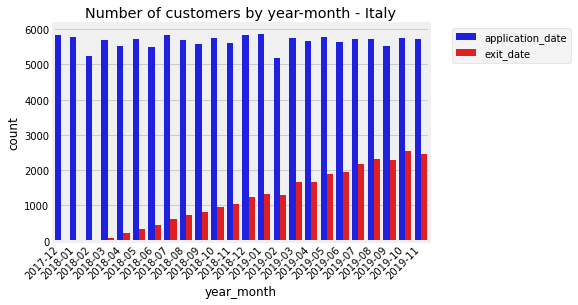

In [14]:
italy_data = df_clients_f[df_clients_f.Geography == 'Italy']

melted_data = pd.melt(italy_data[['application_date', 'exit_date']], var_name='event_type', value_name='date')
melted_data['year_month'] = melted_data['date'].dt.to_period('M')
melted_data = melted_data.sort_values('year_month')
ax = sns.countplot(x='year_month', data=melted_data, hue='event_type', palette={'application_date': 'blue', 'exit_date': 'red'})
ax.legend(title='', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Number of customers by year-month - Italy')
plt.xticks(rotation=45, ha='right')
plt.show()

#### c. Take out clients with more than 75% of their info missing

Create temporary column to filter cases

In [15]:
df_clients_f['pct_missing'] = (df_clients_f.isna().sum(axis=1)/(df_clients.shape[1])) # Number of missings over number of columns

Visualization of missings %

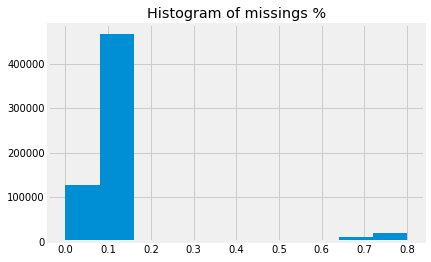

In [16]:
df_clients_f['pct_missing'].hist()
plt.title('Histogram of missings %')
plt.show()

In [17]:
df_clients_f = df_clients_f[df_clients_f['pct_missing']<=0.75]

Delete temp column

In [18]:
df_clients_f.drop(columns=['pct_missing'],inplace=True)

This filter reduces the number of cases to 604,586

In [19]:
df_clients_f.shape

(604586, 10)

#### d. Each client should only have one contract in the database, no more.

There are 17,621 repeated clients, after the previous filters

In [20]:
print(f"Original duplicated cases: {df_clients.duplicated(subset=['CustomerId']).sum()}\nSubset duplicated cases: {df_clients_f.duplicated(subset=['CustomerId']).sum()}")

Original duplicated cases: 45000
Subset duplicated cases: 17621


In [21]:
df_clients_f.drop_duplicates(subset=['CustomerId'],inplace=True)

That leaves us with 586,965 cases

In [22]:
df_clients_f.shape

(586965, 10)

#### e. Remember that for a client to be eligible, it must have at least two years of information within the company (even if it canceled the product).

- Database has a delivery date of 30/11/2019, so that date will be taken for calculation of lifetime

In [23]:
df_clients_f.head()

,CustomerId,Surname,Geography,Gender,HasCrCard,IsActiveMember,EstimatedSalary,application_date,exit_date,birth_date
0,15745584,EIRLS,Germany,Female,0.00,1.00,0.00,2018-12-14,NaT,1997-09-18
1,14990118,MOLOCK,Italy,Male,1.00,0.00,121219.28,2019-01-08,NaT,1980-08-03
3,14648573,NALLS,Spain,Male,1.00,0.00,140827.98,2019-06-19,NaT,1979-02-27
5,15638124,BRASHERS,Italy,Female,0.00,0.00,170661.45,2018-02-23,NaT,1983-01-13
7,14523468,LASKOSKI,Spain,Female,1.00,0.00,158161.23,2017-12-28,2018-11-19,1972-10-30


Calculate years since application by difference between delivery date and application date

In [24]:
df_clients_f['years_since_application'] = (pd.to_datetime('2019/11/30') - df_clients_f.application_date).dt.days / 365

Most of the clients in the database have an application date of 2018 or 2019, so the number of cases will drop greatly when we discard cases with less info than 2 years

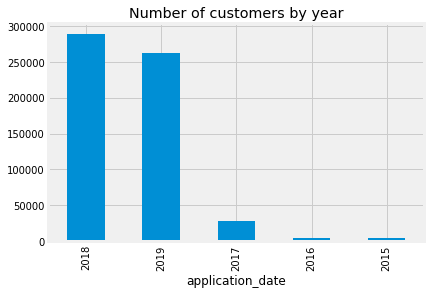

In [25]:
df_clients_f.application_date.dt.year.value_counts().plot(kind='bar')
plt.title('Number of customers by year')
plt.show()

Final filter

In [26]:
df_clients_f = df_clients_f[df_clients_f['years_since_application']>=2]

This way, we keep only 9995 observations

In [27]:
df_clients_f.shape

(9995, 11)

#### Create churn target column:

Considering churners to those with exit dates after less than 2 years since applying

Calculate length of client lifetime by substracting application date to exit date

In [28]:
df_clients_f['application_to_exit'] = (df_clients_f.exit_date - df_clients_f.application_date).dt.days/365

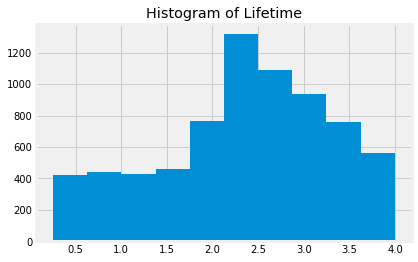

In [29]:
df_clients_f.application_to_exit.hist()
plt.title('Histogram of Lifetime')
plt.show()

In [30]:
df_clients_f['churn'] = [1 if x<2 else 0 for x in df_clients_f.application_to_exit]

Churn results

Given our definition of churn being those with an exit date after less than 2 years, 20% would be churners.

In [31]:
df_clients_f.churn.value_counts() / df_clients_f.shape[0]

churn
0   0.80
1   0.20
Name: count, dtype: float64

If we consider a churn as wether they are an active member or not, then 52% have churned.

In [32]:
df_clients_f.IsActiveMember.value_counts() / df_clients_f.shape[0]

IsActiveMember
1.00   0.52
0.00   0.48
Name: count, dtype: float64

On the other hand, if we define churns as those with an exit date, only 28% haven't got one. So 72% would have churned.

In [33]:
df_clients_f.exit_date.isna().sum() / df_clients_f.shape[0]

0.2818409204602301

If we look at the combination of both:

- As much as 70% of active members have an exit date, making it confusing to understand wether they have churned or not
- 25% of inactive members don't have an exit date as well

In [34]:
df_clients_f[(df_clients_f.IsActiveMember == 1) & ~(df_clients_f.exit_date.isna())].shape[0] / df_clients_f[(df_clients_f.IsActiveMember == 1)].shape[0]

0.6952214452214452

In [35]:
df_clients_f[(df_clients_f.IsActiveMember == 0) & (df_clients_f.exit_date.isna())].shape[0] / df_clients_f[(df_clients_f.IsActiveMember == 0)].shape[0]

0.2574788528987002

## Feature engineering

### Products

Calculate amount of products by customer

In [36]:
df_products.head()

,ContractId,CustomerId,Products
0,5Xo9sCduOGo5EhBYhzKrSlLIA,14993808,Product B
1,3nQbqbnpTeSkYIJWT1UDe1GZ1,15560417,Product B
2,PD9KwDPOwyJWO6LJKPGBbkrCz,15406428,Product C
3,IhS7pz8lu07LCZSqYNlL0fuLP,15604313,Product B
4,ftUey4oVmkZj8RaBVFH6SNzVM,14952409,Product C


In [37]:
df_products_number = df_products.groupby('CustomerId').agg(number_of_products = ('Products','count')).reset_index()

In [38]:
df_products_number.head()

,CustomerId,number_of_products
0,14500000,4
1,14500001,2
2,14500002,2
3,14500003,3
4,14500004,3


### Transactions

Create balance variable

In [39]:
df_transactions.head()

,CustomerId,Transaction,Value
0,15653320,trans_4,-294.03
1,14955663,trans_3,1297.97
2,15218505,trans_4,191.28
3,15391934,trans_3,2299.07
4,14847291,trans_3,1612.10


In [40]:
df_transact_pivoted = df_transactions.pivot(index='CustomerId',columns='Transaction',values='Value').reset_index()

In [41]:
df_transact_pivoted['balance'] = df_transact_pivoted[['trans_1','trans_2','trans_3','trans_4','trans_5']].sum(axis=1)

In [42]:
df_transact_pivoted.head()

Transaction,CustomerId,trans_1,trans_2,trans_3,trans_4,trans_5,balance
0,14500000,1456.63,-317.81,1047.96,-249.61,-1937.17,0.00
1,14500001,2717.35,-149.95,2560.88,-94.99,46372.32,51405.61
2,14500002,3470.33,-868.05,1229.14,-120.02,117052.10,120763.50
3,14500003,4711.95,-224.06,1576.25,313.71,143518.86,149896.71
4,14500004,3959.83,-632.33,2802.98,-804.26,137735.31,143061.53


### Credit scores

In [43]:
df_credit_score.head()

,CustomerId,Date,Score
0,14759722,2018-07-01,717
1,15907276,2011-09-01,562
2,15346641,2013-01-01,604
3,15595126,2018-08-01,469
4,15227788,2013-09-01,655


13 values for customers

In [44]:
df_credit_score.groupby('CustomerId').count().head()

,Date,Score
CustomerId,,
14500000,13,13
14500001,13,13
14500002,13,13
14500003,13,13
14500004,13,13


Given that in this table the dates are beginning of month, and on the client's table they are specific dates, we can join them by year-month combinations.

Create year and month variable

In [45]:
df_credit_score['Date'] = pd.to_datetime(df_credit_score['Date'])
df_clients_f['application_date'] = pd.to_datetime(df_clients_f['application_date'])

In [46]:
# Credit table
df_credit_score['year'] = df_credit_score.Date.dt.year
df_credit_score['month'] = df_credit_score.Date.dt.month

# Client's table
df_clients_f['year'] = df_clients_f.application_date.dt.year
df_clients_f['month'] = df_clients_f.application_date.dt.month

Merge them

In [47]:
df_clients_f = df_clients_f.merge(df_credit_score, how='left',on=['CustomerId','year','month'])

Drop unnecessary columns

In [48]:
df_clients_f.drop(columns=['year','month','Date'],inplace=True)

### Clients

Calculate Age

In [49]:
def calculate_age(born, cut_date):
    return cut_date.year - born.year - ((cut_date.month, cut_date.day) < (born.month, born.day))

In [50]:
df_clients_f['birth_date'] = pd.to_datetime(df_clients_f['birth_date'])

In [51]:
cut_date = pd.to_datetime('2019-11-30')

In [52]:
df_clients_f['age'] = df_clients_f['birth_date'].apply(calculate_age, cut_date=cut_date)

### Final merge

In [53]:
df_clients_f = (df_clients_f
                        .merge(df_products_number,how='left',on='CustomerId')
                        .merge(df_transact_pivoted[['CustomerId','balance']],how='left',on='CustomerId')
                        )

In [54]:
df_clients_f.head()

,CustomerId,Surname,Geography,Gender,HasCrCard,IsActiveMember,EstimatedSalary,application_date,exit_date,birth_date,years_since_application,application_to_exit,churn,Score,age,number_of_products,balance
0,15610711,Eluemuno,Germany,Female,0.00,0.00,167673.37,2017-03-05,2019-11-27,1976-10-21,2.74,2.73,0,678,43,1,128644.46
1,15764170,Pinto,Germany,Male,1.00,0.00,36579.53,2017-02-05,2018-10-11,1972-04-02,2.82,1.68,1,647,47,1,93960.35
2,15594720,Scott,Germany,Female,1.00,1.00,189339.60,2017-11-08,NaT,1982-05-14,2.06,NaN,0,460,37,2,102742.91
3,15706552,Odinakachukwu,France,Male,0.00,1.00,156731.91,2016-02-15,2019-10-02,1979-09-09,3.79,3.63,0,533,40,1,85311.70
4,15785358,Gresswell,Germany,Male,1.00,1.00,79366.98,2016-09-17,2016-12-20,1969-11-11,3.20,0.26,1,586,50,1,106968.96


In [55]:
df_clients_f.shape

(9995, 17)

# EDA

The dataset is balanced

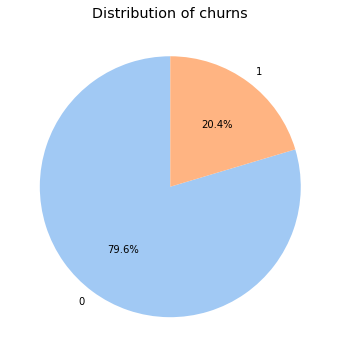

In [56]:
# Count the values in the 'IsActiveMember' column
count_values = df_clients_f['churn'].value_counts()

# Set Seaborn-style color palette
colors = sns.color_palette('pastel')

# Create a pie chart using matplotlib
plt.figure(figsize=(6, 6))
plt.pie(count_values, labels=count_values.index, autopct='%1.1f%%', colors=colors, startangle=90)

# Set plot title
plt.title('Distribution of churns')

# Show the plot
plt.show()

Statistics of variables

In [57]:
df_clients_f.describe()

,CustomerId,HasCrCard,IsActiveMember,EstimatedSalary,application_date,exit_date,birth_date,years_since_application,application_to_exit,churn,Score,age,number_of_products,balance
count,9995.00,9995.00,9995.00,9995.00,9995,7178,9995,9995.00,7178.00,9995.00,9995.00,9995.00,9995.00,9995.00
mean,15690944.68,0.71,0.52,100075.71,2016-06-17 00:09:30.525262848,2018-06-29 10:01:38.300362240,1977-01-14 09:49:41.210605312,3.45,2.35,0.20,650.53,42.37,1.53,76481.62
min,15565701.00,0.00,0.00,11.58,2015-01-02 00:00:00,2015-05-01 00:00:00,1923-09-20 00:00:00,2.00,0.25,0.00,350.00,20.00,1.00,-0.00
25%,15628471.50,0.00,0.00,50973.58,2015-09-22 00:00:00,2017-11-23 00:00:00,1972-01-27 00:00:00,2.71,1.79,0.00,584.00,35.00,1.00,0.00
50%,15690744.00,1.00,1.00,100187.43,2016-06-17 00:00:00,2018-08-25 00:00:00,1978-08-12 00:00:00,3.45,2.42,0.00,652.00,41.00,1.00,97188.62
75%,15753290.00,1.00,1.00,149382.88,2017-03-15 00:00:00,2019-04-12 18:00:00,1984-02-12 00:00:00,4.19,3.05,0.00,718.00,47.00,2.00,127640.39
max,15815690.00,1.00,1.00,199992.48,2017-11-30 00:00:00,2019-11-29 00:00:00,1999-10-20 00:00:00,4.91,4.00,1.00,850.00,96.00,4.00,250898.09
std,71949.43,0.46,0.50,57514.27,NaN,NaN,NaN,0.85,0.93,0.40,96.66,10.54,0.58,62390.93


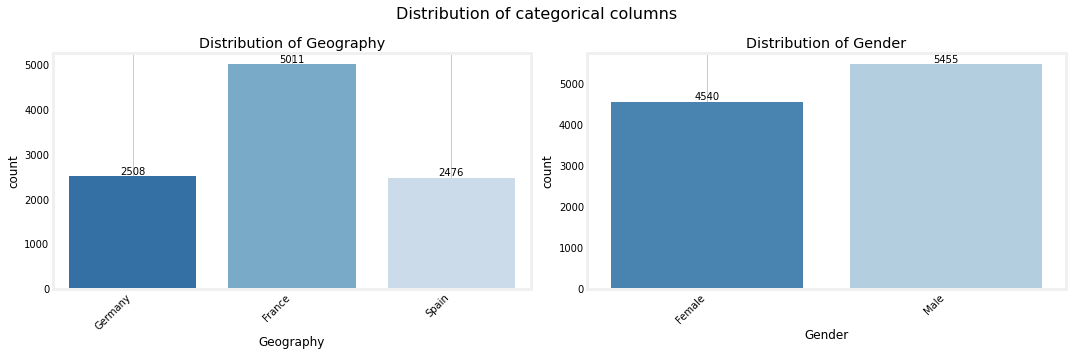

In [58]:
cat_cols = ['Geography','Gender']

num_rows = 1
num_cols = len(cat_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5))

fig.suptitle("Distribution of categorical columns", fontsize=16)

for i, col in enumerate(cat_cols):
    ax = sns.countplot(data=df_clients_f, x=col, palette='Blues_r', ax=axes[i])
    ax.grid(b=None)
    ax.set_facecolor('white')
    ax.set_title(f'Distribution of {col}')
    ax.bar_label(ax.containers[0])
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.tight_layout()
plt.show()

There isn't a clear relationship between these and the target

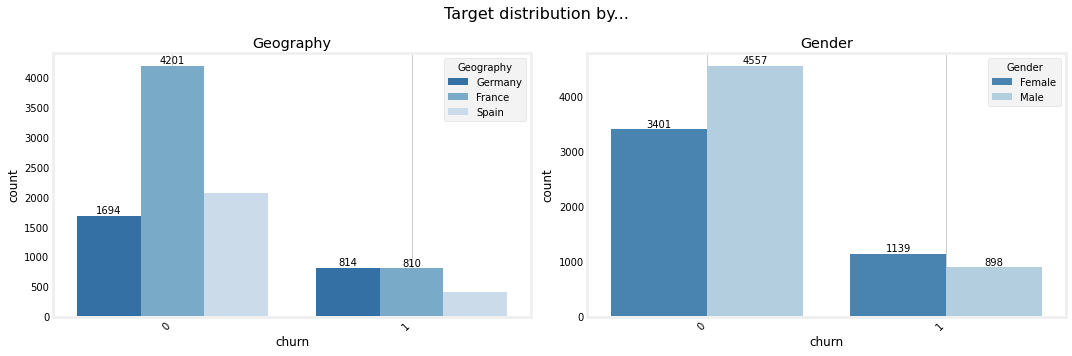

In [59]:
num_rows = 1
num_cols = len(cat_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5))

fig.suptitle("Target distribution by...", fontsize=16)

for i, col in enumerate(cat_cols):
    ax = sns.countplot(data=df_clients_f, x='churn', palette='Blues_r', ax=axes[i], hue = col)
    ax.grid(b=None)
    ax.set_facecolor('white')
    ax.set_title(f'{col}')
    ax.bar_label(ax.containers[0])
    ax.bar_label(ax.containers[1])
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.tight_layout()
plt.show()

Neither for numeric variables, maybe except age

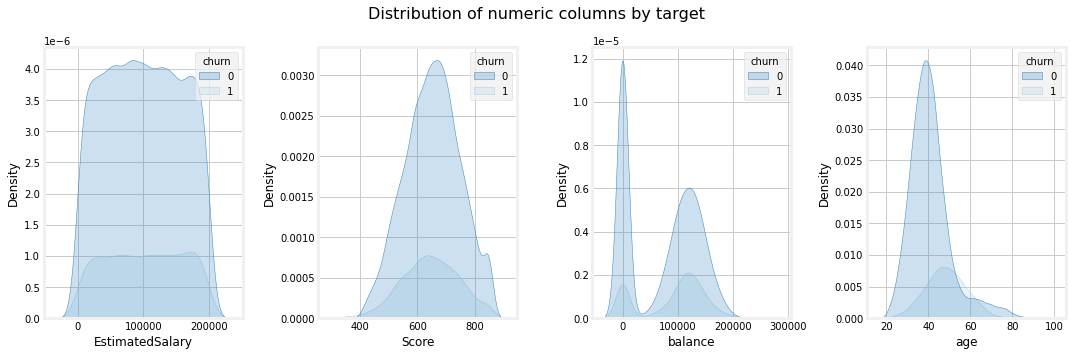

In [60]:
num_cols=['EstimatedSalary','Score','balance','age']

num_plots = len(num_cols)

# Create a grid of subplots
fig, axes = plt.subplots(1, num_plots, figsize=(15, 5))
fig.suptitle("Distribution of numeric columns by target", fontsize=16)
# Iterate through continuous variables and create KDE plots
for i, col in enumerate(num_cols):
    ax = axes[i]
    sns.kdeplot(x=col, hue='churn', palette='Blues_r', shade=True, data=df_clients_f, ax=ax)
    ax.set_facecolor('white')

plt.tight_layout()
plt.show()

Stats for new variables

In [61]:
df_clients_f[['number_of_products','balance','Score','age']].describe()

,number_of_products,balance,Score,age
count,9995.00,9995.00,9995.00,9995.00
mean,1.53,76481.62,650.53,42.37
std,0.58,62390.93,96.66,10.54
min,1.00,-0.00,350.00,20.00
25%,1.00,0.00,584.00,35.00
50%,1.00,97188.62,652.00,41.00
75%,2.00,127640.39,718.00,47.00
max,4.00,250898.09,850.00,96.00


Distribution of numeric variables

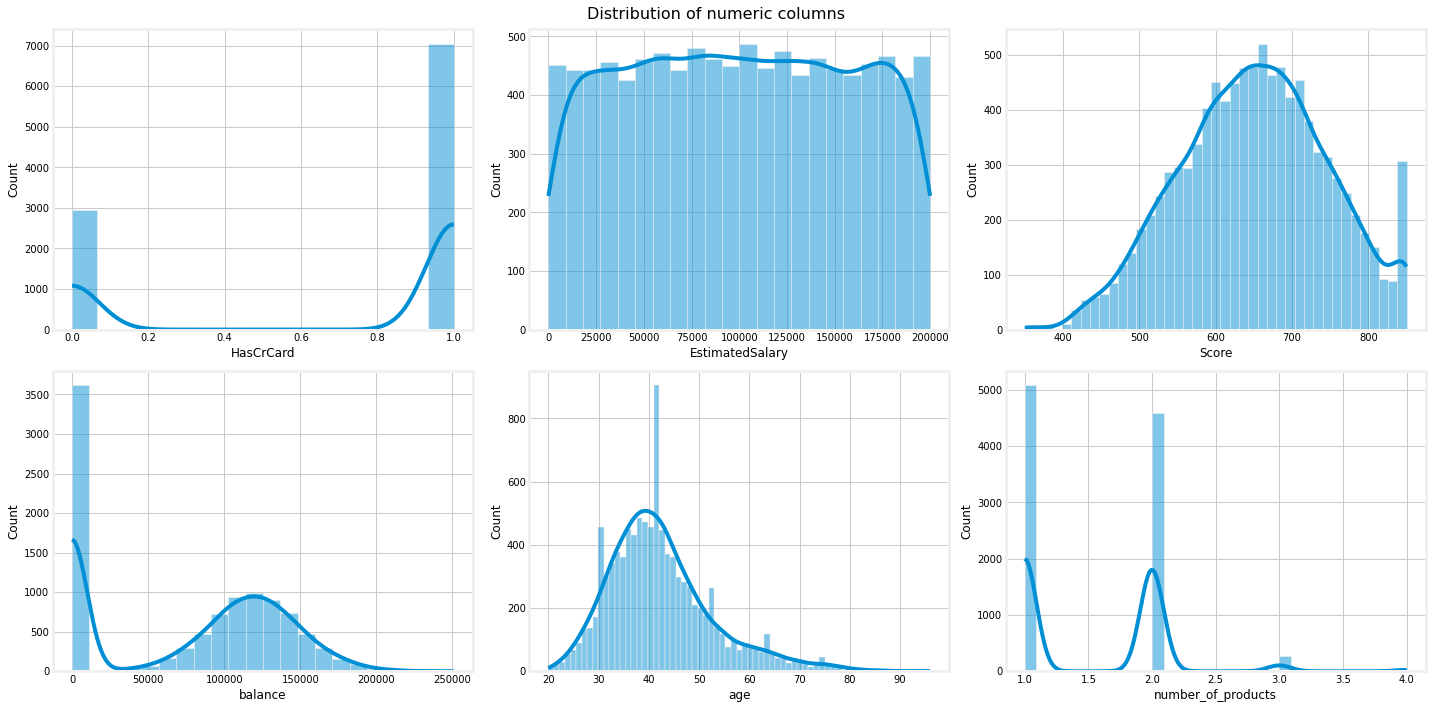

In [62]:
num_cols=['HasCrCard','EstimatedSalary','Score','balance','age','number_of_products']
fig, axes = plt.subplots(nrows=2, ncols=len(num_cols)//2, figsize=(20, 10), facecolor='white')
fig.suptitle("Distribution of numeric columns", fontsize=16)

for i in range(2):
    for j, col in enumerate(num_cols[i * (len(num_cols) // 2): (i + 1) * (len(num_cols) // 2)]):
        ax = sns.histplot(data=df_clients_f, x=col, kde=True, ax=axes[i, j])
        ax.set_facecolor('white')

plt.tight_layout()
plt.show()


Correlation isn't clear

In [63]:
def Generate_heatmap_graph(corr, chart_title, mask_uppertri=False ):
    
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = mask_uppertri
    fig,ax = plt.subplots(figsize=(10,10))
    ax.set_facecolor('white')
    sns.heatmap(corr
                , mask = mask
                , square = True
                , annot = True
                , annot_kws={'size': 10.5, 'weight' : 'bold'}
                , cmap='Blues'
                , linewidths=.1)
    plt.title(chart_title, fontsize=14)

    plt.show()

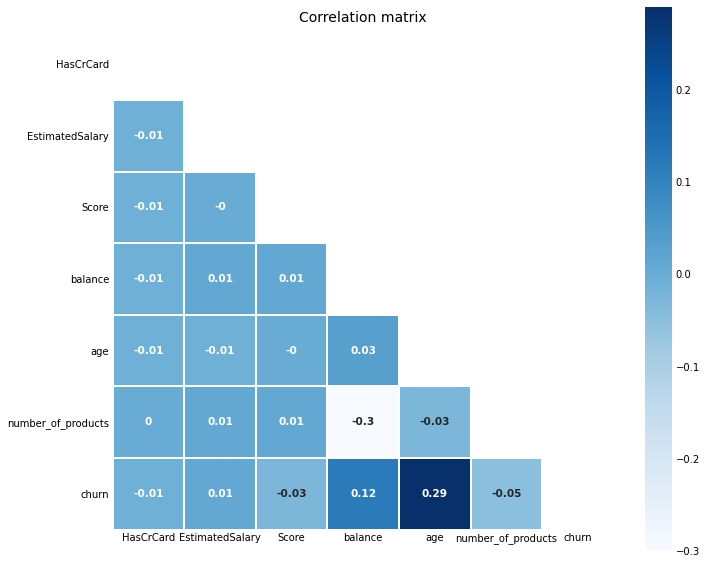

In [64]:
var_corr = round(df_clients_f[num_cols + ['churn']].corr(),2)
Generate_heatmap_graph(var_corr
                       ,chart_title = 'Correlation matrix'
                       ,mask_uppertri = True)

## Outliers analysis

There isn't clear evidence of outliers by first sight

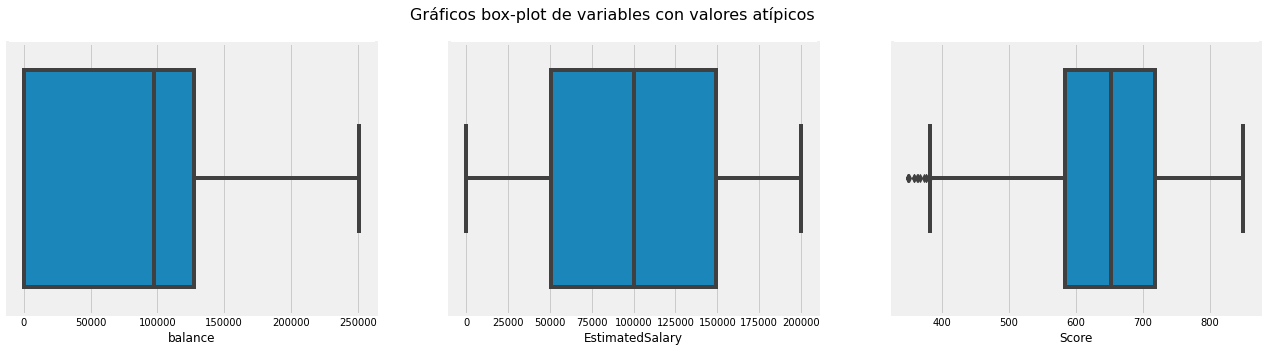

In [65]:
fig, axes = plt.subplots(ncols=3, figsize=(20, 5))
fig.suptitle("Gráficos box-plot de variables con valores atípicos", fontsize=16)

sns.boxplot(x=df_clients_f["balance"], ax=axes[0])
sns.boxplot(x=df_clients_f["EstimatedSalary"], ax=axes[1])
sns.boxplot(x=df_clients_f["Score"], ax=axes[2])
plt.show()

In [66]:
def tukey_outliers(df,column,extreme=False):
    q1, q3 = np.percentile(df[column],[25,75])
    iqr = q3 - q1
    constant = 1.5 if not extreme else 3
    return df[~((df[column]>(q3+constant*iqr)) | (df[column]<(q1-constant*iqr)))] 

In [67]:
outlier_check_cols = ['balance','EstimatedSalary','Score']

for columna in outlier_check_cols:
    outliers = round((1 - len(tukey_outliers(df_clients_f,columna,extreme=False))/len(df_clients_f))*100,2)
    print('Outliers in column',columna,':',outliers,'%')

Outliers in column balance : 0.0 %
Outliers in column EstimatedSalary : 0.0 %
Outliers in column Score : 0.15 %


# Modelling

Import machine learning libraries

In [68]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold, cross_validate, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, roc_auc_score, recall_score, precision_score
from sklearn.ensemble import RandomForestClassifier

seed = 42

Delete columns with no information

In [70]:
df_clean = df_clients_f.drop(columns=['CustomerId','Surname','exit_date','birth_date','application_date','application_to_exit']) # Removing exit_date to avoid leakage

Confirm we don't have any missing values

In [71]:
df_clean.isna().sum()

Geography                  0
Gender                     0
HasCrCard                  0
IsActiveMember             0
EstimatedSalary            0
years_since_application    0
churn                      0
Score                      0
age                        0
number_of_products         0
balance                    0
dtype: int64

Generate train and test datasets

In [72]:
sss = StratifiedShuffleSplit(n_splits =1, test_size =0.2 , random_state =42)
X_train , X_test , y_train , y_test = None , None , None , None

for train_index , test_index in sss.split(df_clean.drop(columns =['churn']) ,df_clean['churn']):
    train_df = df_clean.iloc[train_index]
    test_df = df_clean.iloc[test_index]
    X_train , y_train = train_df.drop(columns =['churn']) , train_df.churn
    X_test , y_test = test_df.drop(columns =['churn']) , test_df.churn

In [73]:
X_train.shape, X_test.shape

((7996, 10), (1999, 10))

In [74]:
(f'Target distribution in train: {round(y_train.mean(),2)}, in test:{round(y_test.mean(),2)}')

'Target distribution in train: 0.2, in test:0.2'

Visualize training data

In [75]:
X_train.head()

,Geography,Gender,HasCrCard,IsActiveMember,EstimatedSalary,years_since_application,Score,age,number_of_products,balance
2540,Spain,Male,0.00,0.00,183656.12,4.19,703,43,1,152685.40
4409,Spain,Female,1.00,0.00,45482.04,4.82,606,30,3,147386.72
9048,Spain,Male,0.00,0.00,143203.78,4.03,605,45,1,103154.66
3513,France,Female,0.00,0.00,83419.15,2.05,675,41,2,0.00
4019,Germany,Female,1.00,1.00,134417.31,3.85,700,34,1,116377.48


Create dummies for categorical variables

In [76]:
categorical_vars = ['Geography', 'Gender']

X_train = pd.get_dummies(X_train, columns = categorical_vars, drop_first=True)
X_test = pd.get_dummies(X_test, columns = categorical_vars, drop_first=True)

Scaling

In [77]:
mm_scaler = MinMaxScaler()

X_train['EstimatedSalary_transf'] = mm_scaler.fit_transform(X_train[['EstimatedSalary']])
X_test['EstimatedSalary_transf'] = mm_scaler.transform(X_test[['EstimatedSalary']])

In [78]:
X_train.drop(columns=['EstimatedSalary'],inplace=True)
X_test.drop(columns=['EstimatedSalary'],inplace=True)

Save checkpoint

In [79]:
X_train_full = X_train.copy()
X_test_full = X_test.copy()

X_train_full['churn'] = y_train
X_test_full['churn'] = y_test

X_train_full.to_csv('../data/train_df.csv', index=False)
X_test_full.to_csv('../data/test_df.csv', index=False)

### Construction of models

Given that our dataset is imbalanced (20-80), we'll use AUC (area under the curve) as a metric.

Note that imbalanced datasets could be treated using methods such as SMOTE or Under/Over Sampling, but it will be left as an improvement for future models

### Baseline

In [80]:
from sklearn.linear_model import LogisticRegression

In [81]:
lr_model = LogisticRegression(random_state=seed)

In [82]:
lr_model.fit(X_train,y_train)

LogisticRegression(random_state=42)

In [83]:
preds = lr_model.predict(X_train)
roc_auc_score(y_train,preds)

0.5171049613649198

In [84]:
preds = lr_model.predict(X_test)
roc_auc_score(y_test,preds)

0.5142612633190523

### Small grid search for optimal model using Random Forest

In [85]:
param_grid = {
    "n_estimators": [x for x in range(5,201,10)],
    "criterion":["gini","entropy"]
}

kfold = KFold(n_splits=5,shuffle=True,random_state=seed)

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state = seed)
                            ,param_grid=param_grid
                            ,scoring="roc_auc"
                            ,cv=kfold
                            ,n_jobs=-1
                            ,verbose=0
                            ,return_train_score=True)

grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [5, 15, 25, 35, 45, 55, 65, 75, 85, 95,
                                          105, 115, 125, 135, 145, 155, 165,
                                          175, 185, 195]},
             return_train_score=True, scoring='roc_auc')

In [86]:
print(f'Best Random Forest: {grid_search_rf.best_estimator_}')
print(f'AUC: {round(grid_search_rf.best_score_,3)}')

Best Random Forest: RandomForestClassifier(criterion='entropy', n_estimators=195, random_state=42)
AUC: 0.849


Feature importances

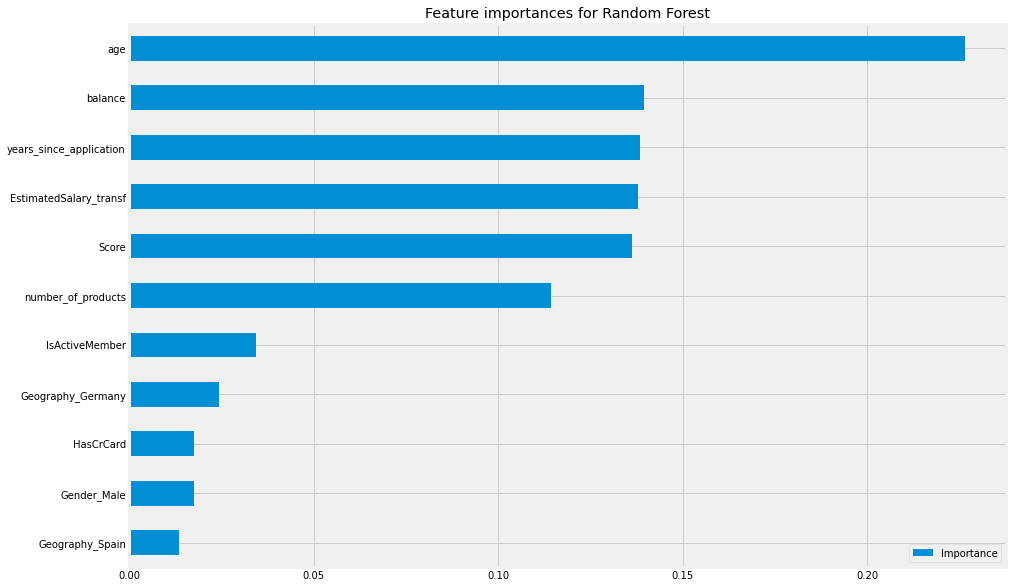

In [87]:
pd.DataFrame(grid_search_rf.best_estimator_.feature_importances_.tolist(), index=X_train.columns, columns=['Importance']).sort_values('Importance').plot.barh(figsize=(14,10))
plt.title('Feature importances for Random Forest')
plt.show()

Test results

In [88]:
preds = grid_search_rf.predict(X_test)
print(classification_report(y_test,preds))
print(roc_auc_score(y_test,preds))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1592
           1       0.77      0.47      0.59       407

    accuracy                           0.86      1999
   macro avg       0.82      0.72      0.75      1999
weighted avg       0.85      0.86      0.85      1999

0.7185705863469682
